## TODO:

- Add noise to individual diffraction patterns.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib as mpl
import skimage
from skimage import filters
from tqdm import tqdm
import tifffile as tif
import joblib
import hdf5plugin
import h5py
import sklearn

In [3]:
h5file = Path('scan_609_018036.h5')
imgfile = Path('ground_609_full.pkl')
h5file.exists(), imgfile.exists()

(True, True)

In [4]:
img_full = joblib.load(imgfile)
img_full.shape

(81, 401)

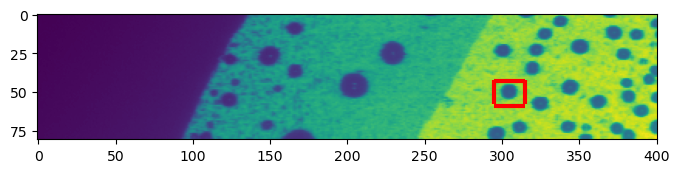

In [5]:
plt.figure(figsize=[8,4])
plt.imshow(img_full)
plt.vlines([125 + 170, 145 + 170], ymin=42, ymax=58, linewidth=3.0, color='red')
plt.hlines([12 + 31, 28 + 31], xmin=295, xmax=315, linewidth=3.0, color='red')

(31.0, 71.0)

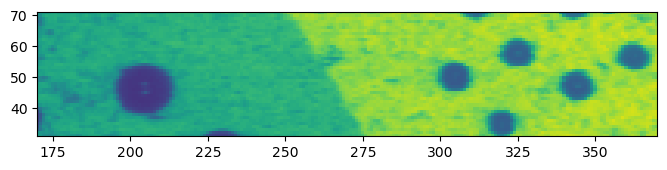

In [6]:
plt.figure(figsize=[8,4])
plt.imshow(img_full)
plt.xlim(170, 370)
plt.ylim(31, 71)

In [14]:
hf = h5py.File(h5file, 'r')
data = hf['entry/data/data']

In [15]:
diffs_roi = np.empty((40, 200, 910 - 740, 488 - 318), dtype='float32')
diffs_non_roi = np.empty((40, 200, 200, 200), dtype='float32')
ycoords = np.arange(31, 71)
xcoords = np.arange(170, 370)
for iy, yval in tqdm(enumerate(ycoords)):
    for ix, xval in enumerate(xcoords):
        indx = np.ravel_multi_index((yval,xval), img_full.shape)
        diff = data[indx][740:910,318:488]
        
        diff_non_roi = data[indx][:200,:200]
        diff[diff > 1e5] = 0
        diff_non_roi[diff_non_roi > 1e5] = 0
        diffs_roi[iy, ix] = diff
        diffs_non_roi[iy, ix] = diff_non_roi

40it [01:05,  1.63s/it]


In [16]:
hf.close()

In [34]:
diffs_roi.nbytes / 1024  /1024

881.9580078125

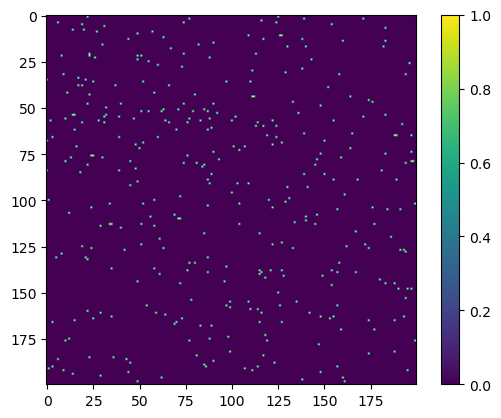

In [22]:
plt.imshow(diffs_non_roi[0,0])
plt.colorbar()

In [24]:
diffs_non_roi[0,0].mean()

0.0091

In [23]:
diffs_non_roi.mean()

0.009291369

In [39]:
rands = np.random.randint(0, 40 * 200, size=25)

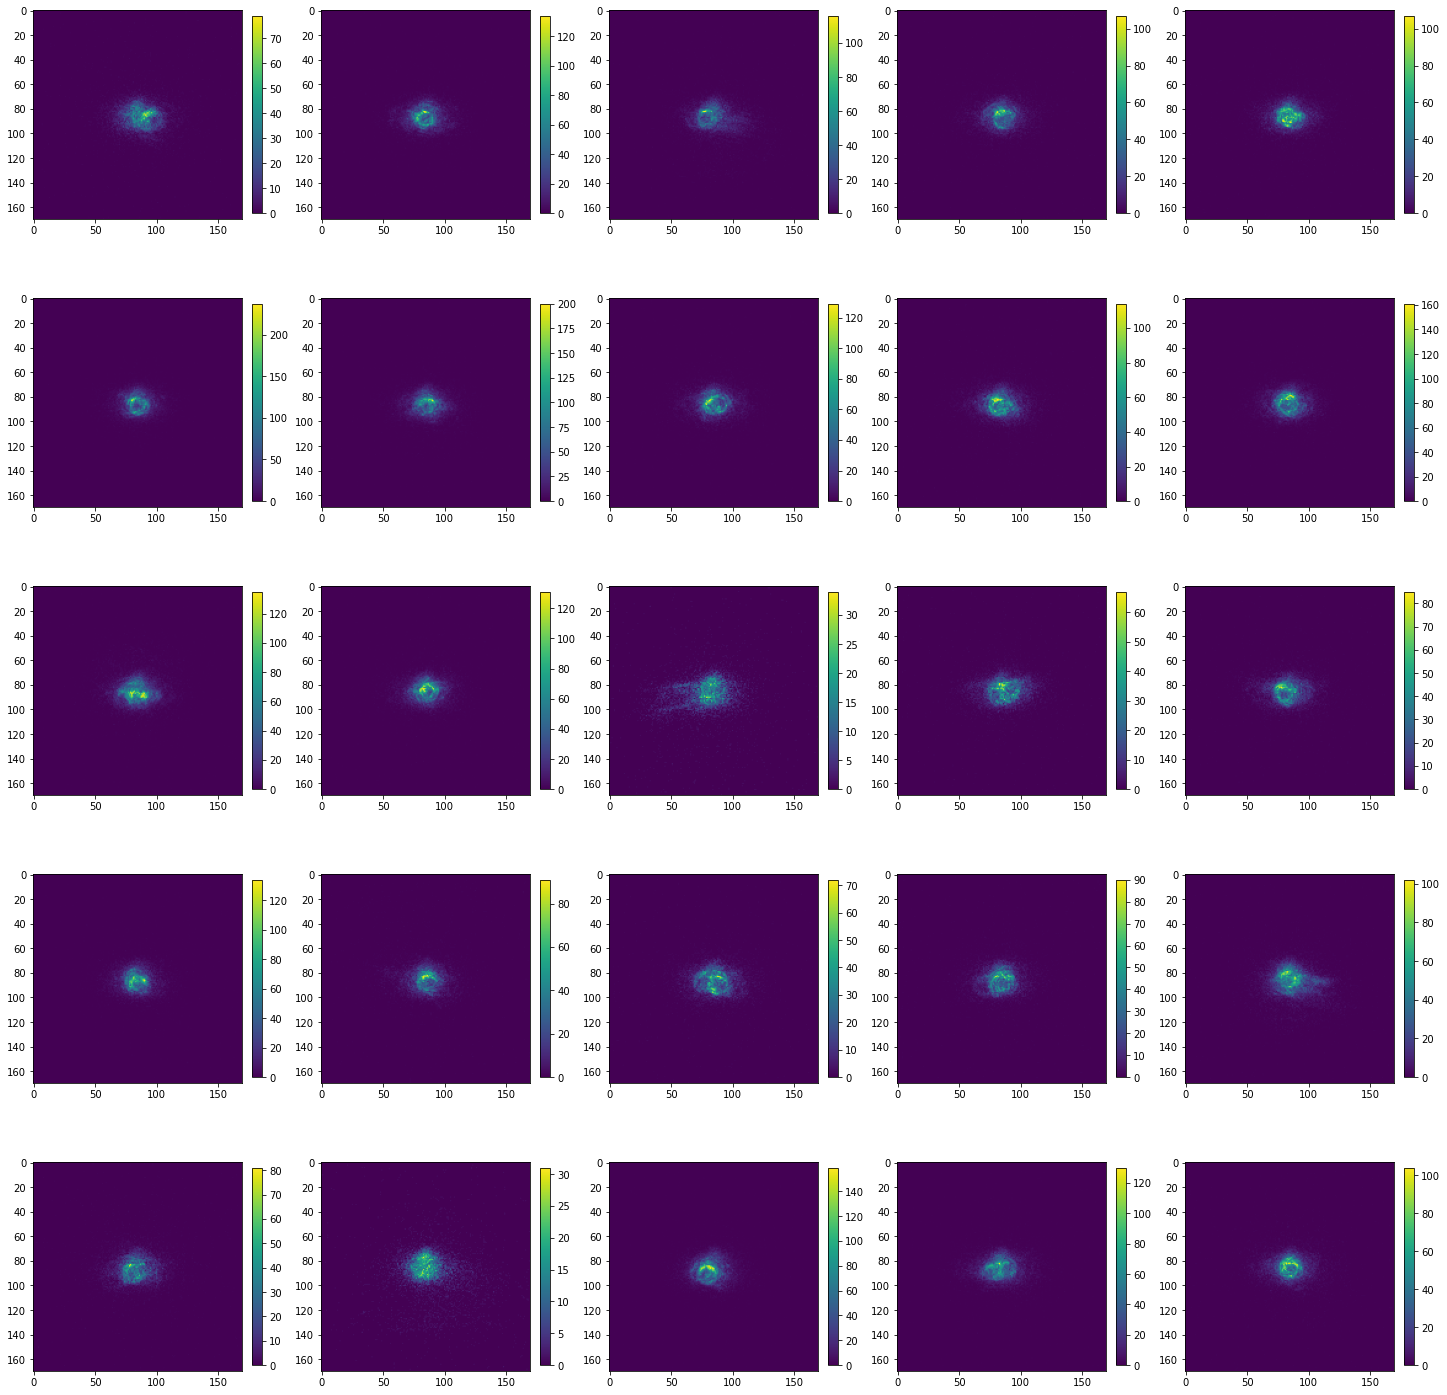

In [41]:
fig, axs = plt.subplots(5, 5, figsize=[20, 20], constrained_layout=True)

axs = axs.flatten()
for i, i_diff in enumerate(rands):
    plt.subplot(5, 5, i + 1)
    plt.imshow(diffs_roi[i_diff % 40, i_diff // 40])
    plt.colorbar(shrink=0.7)
    #tit_str = f'(xp, yp)={h5_coords[i1]}'
    #plt.title(tit_str, fontsize=17)
plt.show()

In [61]:
import joblib

In [71]:
joblib.dump(diffs_roi, 'diffs_roi_for_noisy_fast_sims.joblib', compress=5)

['diffs_roi_for_noisy_fast_sims.joblib']

In [59]:
# Setting the central 40x40 pixel grid to 0
diffs2 = diffs_roi.copy()
diffs2[:,:, 85-15:85+15, 85-15:85+15] = 0

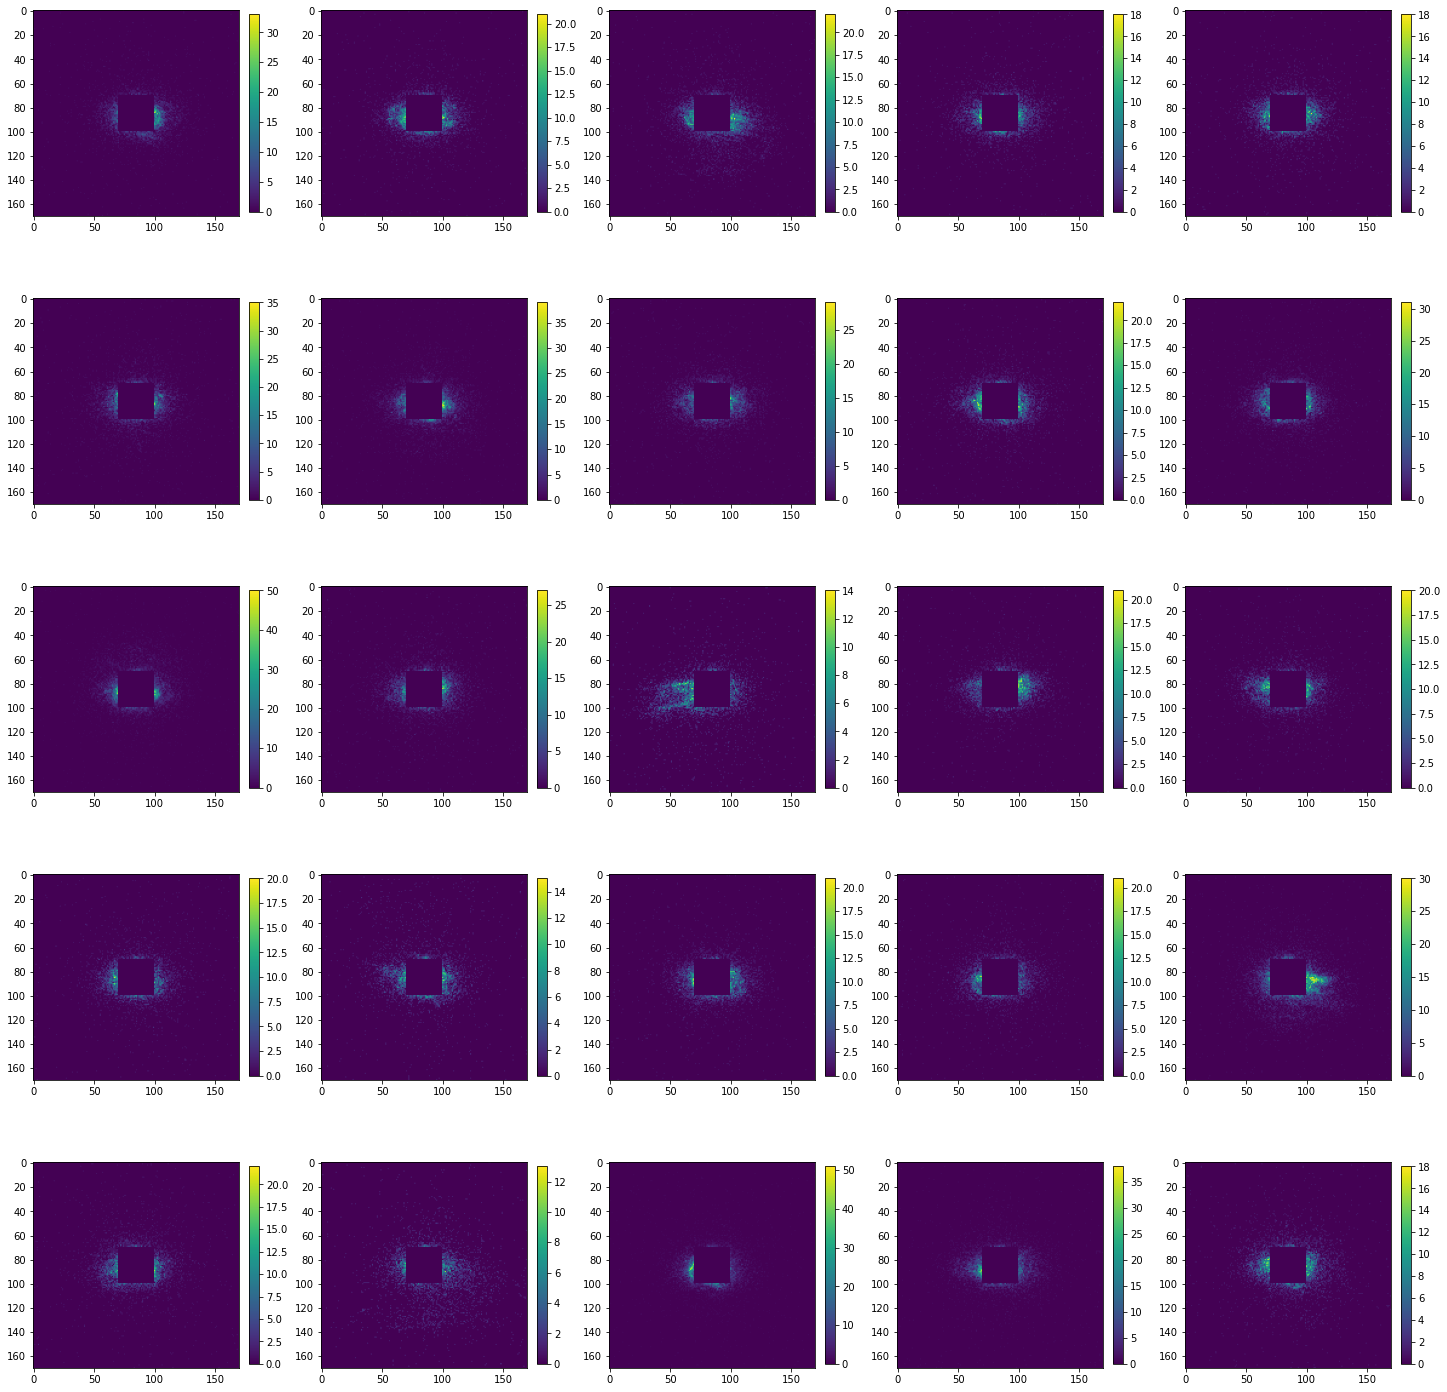

In [60]:
fig, axs = plt.subplots(5, 5, figsize=[20, 20], constrained_layout=True)

axs = axs.flatten()
for i, i_diff in enumerate(rands):
    plt.subplot(5, 5, i + 1)
    plt.imshow(diffs2[i_diff % 40, i_diff // 40])
    plt.colorbar(shrink=0.7)
    #tit_str = f'(xp, yp)={h5_coords[i1]}'
    #plt.title(tit_str, fontsize=17)
plt.show()